In [1]:
# 1. استيراد المكتبات
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 2. تحميل البيانات
df = pd.read_csv("Social_Network_Ads (Assignment 1).csv")

# 3. المعالجة المسبقة
df.drop("User ID", axis=1, inplace=True)
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

# 4. تجهيز المتغيرات
X = df.drop("Purchased", axis=1)
y = df["Purchased"]

# 5. مقياس الميزات (اختياري لكن نستخدمه هنا للتوحيد مع النماذج الأخرى)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7. تدريب نموذج Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 8. التنبؤ وتقييم الدقة
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy * 100:.2f}%")


Decision Tree Accuracy: 85.00%


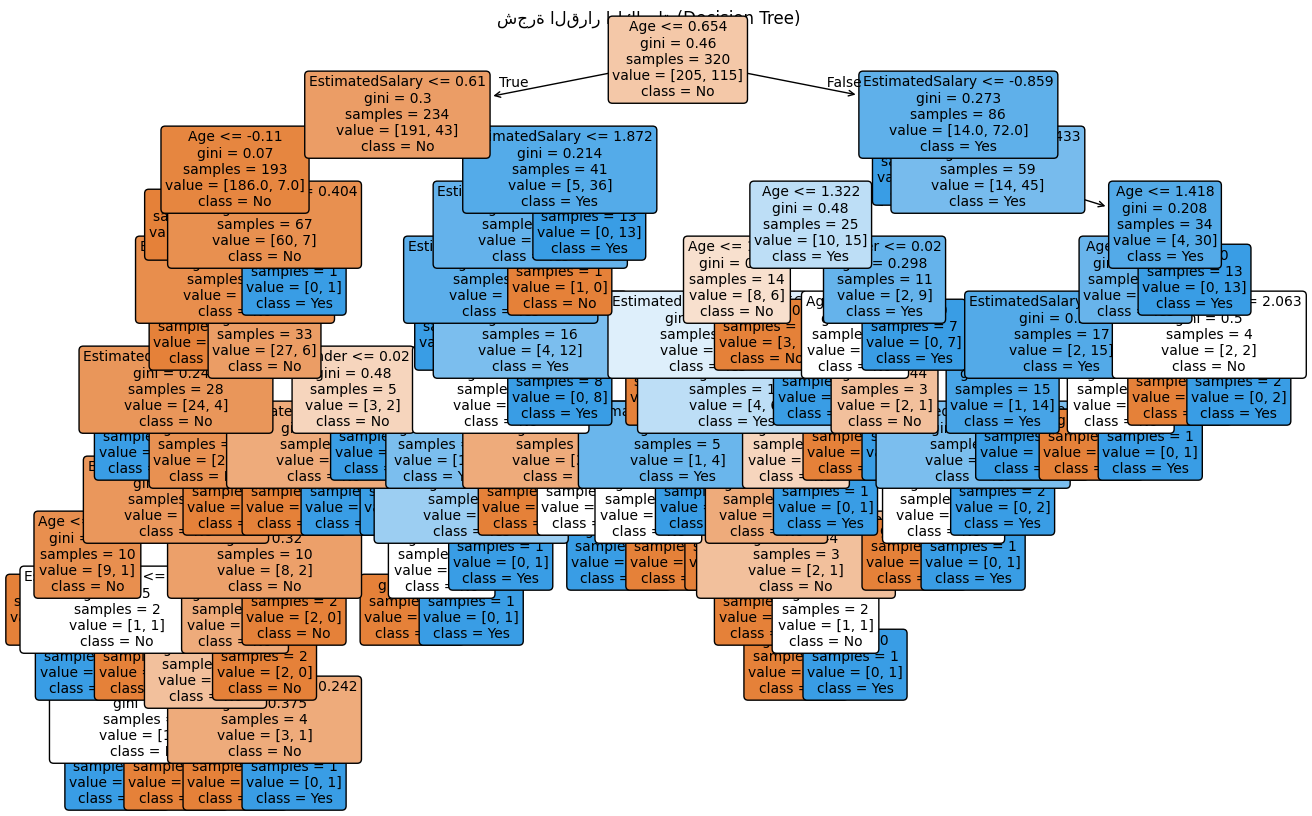

In [2]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# رسم شجرة القرار
plt.figure(figsize=(16, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("شجرة القرار الكاملة (Decision Tree)")
plt.show()
